# Intro To Unix
Course notes can be found at https://github.com/VincentToups/datascience-book/tree/main/unix-and-shell-fundamentals.
## Why Learn Unix?
Unix, generally in the form of Linux, but also commonly encountered as the underlying idiom of OSX and other important systems, powers the world.

The code below generates a graph that shows the percentage of servers running Unix as a function of time. 

# A tibble: 6 × 5
  Source  Month  Year  Unix Windows
  <chr>   <chr> <dbl> <dbl>   <dbl>
1 W3Techs May    2021  75.3    24.8
2 W3Techs Jan    2020  71      29  
3 W3Techs Jan    2018  66.8    33.2
4 W3Techs Jan    2016  67.7    32.3
5 W3Techs Jan    2014  66.8    33.2
6 W3Techs Jan    2012  63.5    36.5


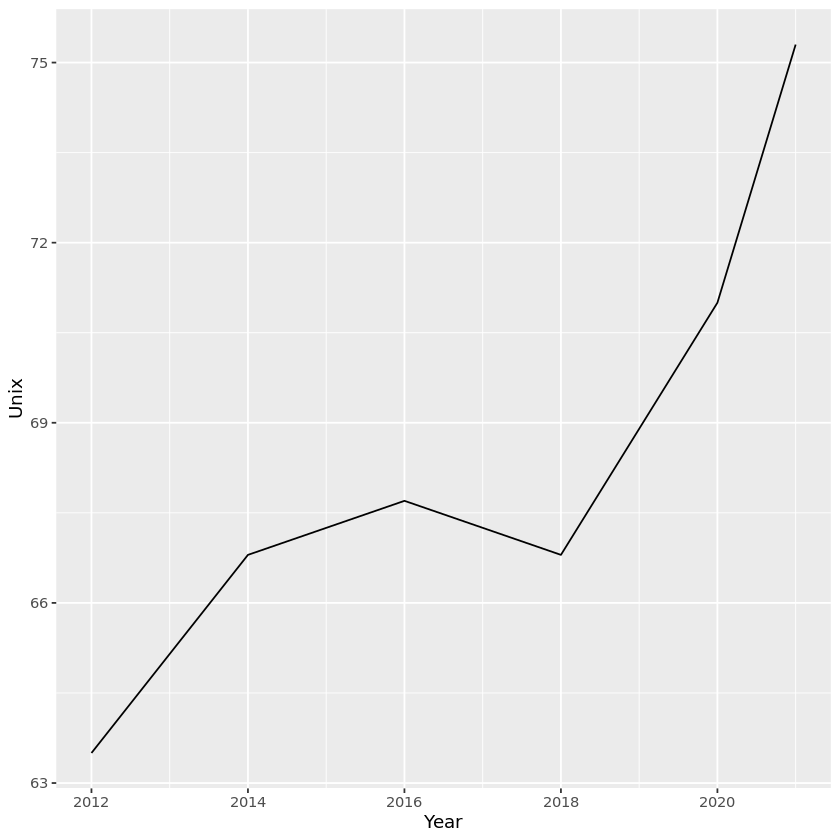

In [1]:
suppressPackageStartupMessages(library(tidyverse));
read_md_table <- function(path) {
    suppressMessages(
    read_delim(
    path,
    delim = "|",
    trim_ws = TRUE,
    skip = 1,          # skip the separator row of dashes
    show_col_types = FALSE
  )) %>%
    select(-1, -last_col()) %>%   # drop empty columns from leading/trailing pipes
    rename_with(str_trim) %>%
    filter(row_number() != 1) 
}

data <- read_md_table("./data.csv") %>%
  mutate(Year=Year %>% as.numeric(),
         Unix= Unix %>% as.numeric(),
         Windows = Windows %>% as.numeric())
print(data)
p <- ggplot(data, aes(Year, Unix)) + geom_line()
p

Some very popular data science software (RStudio Server, Jupyter/Labs) runs on **Linux** (even if you access them via a web browser on any platform).

**The true key to portable data science is Docker.** It is true that you can run Docker in Windows but the configuration of docker containers requires a good working knowledge of the Unix idiom, since most containers are Linux-based.

### Virtual Machines
A virtual machine is something that runs the entire operating system in a simulation of a computer. The big benefit of a virtual machine is you can configure it to run the software, and then save a copy of it. The downside of virtual machines is that you have to allocate it some memory, it has to simulate the entire computer that it needs to simulate, so it's slower than a native machine.

### Docker vs. Podman
Docker and Podman are **containerization systems** and **podman intentionally implements a docker compatible interface**. The main difference is that podman is _serverless_ and runs without root privileges, which makes it both somewhat safer and lighter, but also makes certain natural patterns in docker not work in podman. 

### Virtual Machines -> Docker/Podman
Docker and Podman are a happy medium between a full virtual machine and just running software locally on your computer.  

They run something called the **container**. From inside the container, it looks like a virtual machine would look. You see an operating system, it isn't the operating system on your computer, it's a configured operating system that you can snapshot, pass around, give to people. However, all of the stuff running inside the container is just a regular process running on your computer. It shares memory and processor time using exactly the same mechanics that any other process would use. This lets you build something like a lightweight virtual machine. 

## Installing/Running Docker
### Windows Users - Slightly Different Set Up
For Windows users I highly recommend using the instructions located here to set up Docker on your computer:
```
https://docs.docker.com/docker-for-windows/wsl/
```
This will help you set up both Windows Subsystem for Linux (which will allow you to run a Linux environment natively on Windows) and setting up the appropriate Docker install on top of it.

### Mac Users - (Mostly) Standard Set Up
Mac users can use the standard Docker install. Linux users will typically know what they want to do, but the short version is install Docker via the instructions appropriate to your distribution and make sure you are in the docker group.

**Users of Apple Silicon Macs might find using the `rocker/verse` images upon which we base most of the course problematic (they are not compiled for ARM processors).** Someone has hacked together a version for Apple Silicon Macs:
```
https://github.com/elbamos/rstudio-m1
```
And you might be able to get the Rocker images running by enabling Rosetta. See this thread:
```
rocker-org/rocker-versioned2#144
```
We will discuss Docker in greater detail in later chapters.

## Introduction to Computers
A computer, even a smartphone, is a **machine with a processor**, which **performs mathematical operations on data**, memory, which is volatile storage (it will be erased in the event that the computer is turned off) which forms the short-term memory of the machine, and non-volatile storage (disks, solid state memory, even, sometimes still, spinning rust) which is persistent data store which survives even when the machine is off.  
*In the early days of computers*, the user had to interact with the computer by telling it which memory to access, what to do with it, and how to store or output the results.  
*Now*, the user is not as "in the weeds" as they used to be, and we don't think about these details explicitely.

## Introduction to Unix Shells
### Vocabulary
1. **Unix**: a family of multi-user, multi-tasking operating systems that is widely used today; has a command-line interface, which allows users to type commands to interact with the system, and a hierarchical file system structure
2. **Linux**: what Macs use; a Unix-like operating system
3. **Shell**: a program which lets you interact with all the functionality of a system (the operating system, in this context, though other systems have shells too); called a "shell" because its a *shell around the OS*
4. **Terminal emulator**: a shell is something that sits between a user and an OS and the *"place" the shell sits is the terminal emulator* (HOSTS a shell) 
   - At the most basic level, the user sends bytes to the shell and the shell sends bytes back. We might want to do other things besides just show text: color code, animate, show images, etc.
   - A terminal emulator can do special stuff with bytes returned by the shell to present effects, control, etc.
5. **Process**: something running on your computer
6. **Signal**: things we can send to processes to tell them to do something
7. **Standard input/standard output**: each process has these; they can read
characters from the input and write to the output
8. **Command line arguments**: things we pass to a process when we start it
9. **The environment**: all the stuff a process can see when its running; ok to imagine that when one process starts another, the child process sees all the same stuff as the parent

**Note:** There are many shells and many terminal emulators and you can mix and match them.

Here's a basic level map: 
![](vocab_map.png)

### Unix Commands/Vocab And What They Mean
These are the ones we went over in class, for more, see here a Unix cheat sheet. Here's one I like: https://alexji.com/UNIXCheatSheet.pdf 
1. **Prompt**: what you see when you open the terminal; normally give's you some information about the device you're on and the folder you're in in the form `username@hostname ~/path/to/directory`
2. `ls`: Lists files and subdirectories of your current directory
3. `|`: pipe operator for Unix
4. `ls | wc`: Takes the directory and outputs the number of words, number of files, and number of words, and the number of bytes
5. `bash`: starts bash shell
6. `CTRL-D`: command to exit the shell; sends an end of file character, which tells the process "the input is over so its time to quit"
7. `CTRL-C`: kills non-interactive processes by sending a SIGINT ("time to die")

## Running a Shell
#### Mac/Linux
Run your Terminal application. (I use a Mac, so this is why you'll see me telling you to type things into your terminal.)
#### Windows
Install Git Bash (instructions were in the Git lectures!), Cygwin, or install Ubuntu or another Linux variant in a Virtual Machine or spin up an Ubuntu container in Docker.
### Why use a shell?
Though we have a bigger cognititive burden when running the shell, it gives us the following two very important advantages:
1. **Control**: The shell gives us enormous, fine-grained, control over the resources the computer gives us.
2. **Reproducibility**: Because all the actions we might undertake with the shell are represented as text, we can easily copy and paste them into a file and re-run them.

### Control
The Unix Philosophy suggests that tools (programs) should:
1. Do one thing
2. Do it well
  
Almost everything in Unix is **represented as a file**. All **programs operate on files**, typically by **reading an input file and producing an output file**. More complex outcomes are achieved by **stringing many small
programs together**, each operating on the output of the previous until a
desired result occurs. Text based files are very commonly the inputs and
outputs of these processes.

### Reproducability
Unix Shells are text based interfaces. 
**Steps**:
1. Understand what we want to by interacting with a shell directly.
2. Copy and paste the commands we've concocted into a "shell script" and re-execute them.
3. Repetitive tasks can be trialed a few times and then run over and over
again and gradually refined.
4. Combining this with tools like git, which make it easy to
record the history of a file over time, you have a system for ensuring
that what you do is recorded for posterity and reproducible.
**Graphical User Interfaces**, in contrast, **introduce many non-meaningful
degrees of freedom which make it difficult to automate workflows
for them**, even when such tools exist. Learning to use the Shell will teach you a powerful way of simply and easily orchestrating work your computer does.

## Shell Concepts
### Different shells?
Unix supports many different shells which behave similarly.  
Dr. Toups will be assuming `bash` because it is the most common. He'll be trying to write bash code which will run in most other shells (most notably zsh, which is recently the default OSX shell) for simplicity. But if you run into an issue, make sure you are running bash by simply typing `bash`. To exit the shell, press `CTRL-D`. 
### Example of killing the process
Let's say we type: 
```bash
sleep 100 # sleep for 100 seconds
```
#### Options:
- Kill it with `CTRL-C` (send a SIGINIT)
- Stop it with `CTRL-Z` (SIGSTP) then tell it to keep going in the background with `bg`, or bring it to the foreground with `fg` (both require the job number)
- List the process id with `ps`, then kill it with `kill <process id>`.

## Types of Data
1. Strings: an ordered collection of characters.
2. Numbers (integers)
3. Arrays and associative arrays (sequences of things and name->thing maps)

On the shell things tend to pass back and forth between these types pretty fluently. This is bad design but we have to live with it.  

The most important thing to bear in mind is that when I say something is "just a string" I mean that the computer doesn't know what to do with it - it's just purely data.  

## REPL

The shell is one example of a "read, eval, print" loop. It

1.  Reads an input (typically a line of text)
2.  Evaluates it (turning it into an action or side effect or value of
    some sort)
3.  And then prints the result (or nothing, if a side effect)

At its most superficial level this is how we interact with a shell:

```bash
ls
```

Reading is trivial - the input you type is just a list of characters.
Evaluation is where things get tricky.

## Evaluation
A theme of this course is that *all programming languages* do more or
less the same thing: they translate text into actions. If you develop a
good mental model of that process then you *understand* the language.

Given the ubiquity of Bash, its evaluation model is surprisingly
complicated. Luckily for us, we will be concerned with its simplest
aspects.

Superficially and in the simplest case, bash does the following when you
type a command:

1.  the text is split into tokens on the spaces
2.  the first token is assumed to be a command you want to execute. Bash
    tries to find a file which implements this command by looking it up
    on the "PATH" (of which more later).
3.  the subsequent tokens are passed to the command as "arguments".
    Arguments are additional pieces of information the command may want
    or need to change the way it executes.

So when we typed "ls" above, bash read this as us wanting to run the
command "ls" which it found on our hard drive. Then it saw that we
passed no arguments to the command, so it executed it without any.

### Eg 1

```bash capture
ls -t -l
```


In the above example, the shell reads "ls -t -l", splits it apart on the
spaces like this: `[ls, -t, -l]` finds the `ls` command, and passes the
`-t` and `-l` arguments to it. Note that these arguments are just passed
as strings to the `ls` command. It is up to `ls` to decide what, if
anything, they mean. In this case, they mean "sort the file list by
modification time" (`-t`) and "print out more information about the
files" (`-l`)

### Eg 2

```bash 
something_silly a b c
```

The above will generate an error like this:

    bash: line 1: something_silly: command not found

How does the shell know what command we want to run?

## The PATH and other environment variables

When a string is evaluated the shell must find what command we want to
run. How does it do so?

Some background: apart from a few built in commands (the so-called
[builtins](https://www.gnu.org/software/bash/manual/html_node/Bash-Builtins.html))
commands in shell scripts are just executable files stored somewhere on
the hard drive. The command `which` tells us where such commands qua
files are located:

```bash 
which which
```

```bash 
/usr/bin/which
```

A good piece of jargon to have in your head here is that `which`
"resolves" to `/usr/bin/which`.

If you haven't seen unix style file locations, note:

1.  on a unix system *every file* lives beneath the so-called "root" of
    the file system, called `/`.
2.  anything between two `/` (called *path separators*) is a /directory.
3.  the last term may be a directory or a file. In this case, it is the
    executable file which implements the `which` commands.

`which` resolves in the same way that Bash resolves, but how does that
work?

They look in something called an environment variable called PATH. You
can see what an environment variable holds like this:

```bash capture
echo $PATH
```


To understand this behavior we need to add a new rule to our mental
"evaluation engine":

> When we see a $ followed immediately by a name we look up the value of
> the variable named and insert it into the string. This happens before
> the other rules are executed.

Apparently, `PATH` contains a series of locations on the filesystem
separated by ":" characters. Bash searches this list in order to find
executables during command evaluation.

So in the case of `which` it looks in

1.  `/home/toups/.local/bin` (no hit)
2.  `/usr/local/local/sbin` (no hit)
3.  `/usr/bin` (hit!)

By modifying this environment variable we can modify the way bash looks
up commands. But how would we create our own command to test out this
ability?

Let's create a directory

And then let's create a directory:

```bash capture
mkdir -p my-commands
readlink -f my-commands
```


(your file will obviously be somewhere else on your personal computer).

And now let's create the file


my-commands/hello.sh


```bash file=my-commands/hello.sh
#!/bin/bash

echo hello world

```


First we need to tell our Unix that we want to give the file "hello.sh"
permission to act as an executable:

```bash 
chmod u+x my-commands/hello.sh
```

And then we can

```bash 
PATH="$(readlink -f my-commands):$PATH"
hello.sh
```

```bash 
hello world
```

```txt file=rules.txt
1. after read, split by space
2. if a token looks like $NAME, then look in the env for NAME and replace the
   $NAME with whatever NAME is associated with.
3. see if the first token looks like NAME=VAL and if so we add an env
   (or export NAME=VAL)
4. tries to find a command associated with the first token 
   by looking in the path.

```


In order to understand this result we need to add another rule:

> If we see a name followed immediately by an equal sign and then a value,
> modify or create a new environment variable of that name with the
> specified value. No regular evaluation occurs but environment
> variables themselves are expanded before setting the value.

If some of the above steps are a little confusing to you, that is ok -
we're not going for a full understanding of working on the command line:
we want just enough to get around.

We will develop more as we go.

The PATH isn't the only environment variable. What variables are defined
will vary a lot by system and situation, but you can see a list of all
of them by saying:


the environment


```bash 
env | head
```


```org 
SHELL=/bin/bash
SESSION_MANAGER=local/cscc-laptop:@/tmp/.ICE-unix/2031,unix/cscc-laptop:/tmp/.ICE-unix/2031
QT_ACCESSIBILITY=1
SNAP_REVISION=1161
XDG_CONFIG_DIRS=/etc/xdg/xdg-ubuntu-wayland:/etc/xdg
XDG_SESSION_PATH=/org/freedesktop/DisplayManager/Session0
XDG_MENU_PREFIX=gnome-
GNOME_DESKTOP_SESSION_ID=this-is-deprecated
SNAP_REAL_HOME=/home/toups
SNAP_USER_COMMON=/home/toups/snap/emacs/common
```


## Variables

You can declare your own variables or modify those that already exist
(assuming they aren't read only).

The easiest way to declare a variable is:


declaring a variable


```bash 
VARNAME=somevalue
echo $VARNAME
```


Note that when we declare a variable we do *not* precede the name with a
`$`. The dollar sign is what tells Bash to look the variable value up
when we want to *use* it somewhere.

With variable definition and usage rules in our head, we can now extend
our mental model of bash evaluation.

1.  for every line in a script
    1.  perform variable substitution (wherever we see a $NAME look up

    the value and insert it into the line)
    1.  if the line is a command, do command evaluation otherwise do
        variable assignment

The only really important remaining ingredient is non-variable
substitution.

Consider again the following line from the above example:


Substitution


```bash 
PATH="$(readlink -f my-commands):$PATH"
```
```txt file=rules.txt
1. after read, split by space
2. if a token looks like $NAME, then look in the env for NAME and replace the
   $NAME with whatever NAME is associated with.
3. if an expression like $(...) is found, evaluate ... with these rules 
and put the output into the command.
4. see if the first token looks like NAME=VAL and if so we add an env
   (or export NAME=VAL)
5. tries to find a command associated with the first token 
   by looking in the path.

```

Ordinarily no *evaluation* occurs on the right hand side of an
assignment. The material there is just treated as a string (or a number,
if it happens to be a number). But by using a `$(...)` construct we can
perform a substitution: the interior of the `$(...)` is evaluated like a
command and the result is inserted into the line where it appears.

We can use this to compose together multiple commands. Consider that
`ls -t | head -n 1` will return the most recently modified file. `head
<filename>` will print out the first few lines of a file. If we want to
print the first few lines of the most recently modified file:


combining commands with substitution


```bash capture
head $(ls -t | head -n 1)
```


```org 
* Why Learn Unix

Unix, generally in the form of Linux, but also commonly encountered as
the underlying idiom of OSX and other important systems, powers the
world.

#+tblname: servers
| Source  | Month | Year | Unix | Windows |
|---------+-------+------+------+---------|
| W3Techs | May   | 2021 | 75.3 |    24.8 |
```

(The most recently modified file is this document!).

## stdin, stdout, stderr and pipes

We have one more important element of the shell to learn. Recall that
shell commands communicate by reading input from somewhere and writing
it out to a new location. Most often the place they read from is the
"standard input" (abbreviated stdin). And the most common place they
output things is the "standard output". If there is an error of some
kind most processes report this on another file called the "standard
error."

In the above example, when we used the command `head` we passed a
filename in as a command line argument and the result was printed to the
standard output.

We can also redirect the standard output to a file:


Redirecting the standard output.


```bash 
ls -t > files-in-order
head files-in-order -n 3
rm files-in-order
```


```org 
files-in-order
unix.org
unix.html
```

The syntax `<COMMAND> > file` sends the standard output to `file`.

But often creating a temporary file is a hassle if we just want to apply
many commands in sequence. Thus we can also "pipe" one command's output
to another's input. In that case the second command reads from the
output of the previous *instead* of from the stdin file.


Piping output into input.


```bash 
ls -t | head -n 3
```


```org 
unix.org
unix.html
my-commands
```

The `|` (called a "pipe") means: take the output from the first item and
send it to the second. We can pipe many times in a row.


A chain of pipes.


```bash 
ls -t | head -n 3 | grep y
```


```org 
my-commands
```
```txt file=rules.txt
1. after read, split by space
2. if a token looks like $NAME, then look in the env for NAME and replace the
   $NAME with whatever NAME is associated with.
3. if an expression like $(...) is found, evaluate ... with these rules 
and put the output into the command.
4. see if the first token looks like NAME=VAL and if so we add an env
   (or export NAME=VAL)
5. if our expression contains | or > then look at the pieces of the expression
   (broken on the pipes or before the redirects).
   For pipes start the first commend, connect stdout the next, etc. 
   for redirects send the stdout to the file
5. tries to find a command associated with the first token 
   by looking in the path.

```

The output of `ls` goes to `head` and the output of `head` goes to
`grep`. Some bash scripts are little more than a long series of pipes.
Learning to program this way is very enlightening and we'll see a
similar "chain of operations" approach in R and Python

## Conventions to bear in mind

```bash 
OLD_DIR=$(pwd)
cd /tmp # the temporary directory on a Linux machine.
touch test # touch just creates an empty file or updates a file's modification time.
cd $OLD_DIR
```


Also interesting: `pushd` and `popd`.

### find

`find` lets us search for files in a variety of ways. A simple example:


Finding all R files beneath the pwd.


```bash 
find . -iname "*.png"
```


```org 
./4.png
./z.png
```

`find` is very powerful and also a little weird in places. But it is so
useful that having a basic working knowledge of the command will be very
much worth it.

### grep

`grep` lets you search for things *in* files:


Using grep.


```bash 
grep -n hello unix.*
```


```org 
unix.html:776:<label class="org-src-name"><span class="listing-number">Listing 6: </span>my-commands/hello.sh</label><pre class="src src-bash"><span style="color: #7f7f7f;">#</span><span style="color: #7f7f7f;">!/bin/</span><span style="color: #1c86ee;">bash</span>
unix.html:778:<span style="color: #cd6600;">echo</span> hello world
unix.html:785:"hello.sh" permission to act as an executable:
unix.html:789:<pre class="src src-bash">chmod u+x my-commands/hello.sh
unix.html:799:hello.sh
unix.html:808:hello world
unix.org:344:#+CAPTION: my-commands/hello.sh
unix.org:348:echo hello world
unix.org:353:"hello.sh" permission to act as an executable:
unix.org:356:chmod u+x my-commands/hello.sh
unix.org:368:hello.sh
unix.org:373:hello world
unix.org:643:grep hello 
```

Given a string and a list of files as arguments, grep prints out the
file and line number (with the right command line switch `-n`) where the
string occurs.

### xargs

`xargs` deals its inputs to a command. The use case is when we want the
output of one command to go to the command line of a second command, as
opposed to going to the standard input of the second command.

If that isn't super clear, don't worry about it. I introduce `xargs`
here because I want to show one very useful use case:

Suppose I want to find everywhere a particular function is mentioned in
all the R files in a project. Then I say:


Using find with grep.


```bash 
find . -iname "*.R" | xargs grep read_csv
```


If we were to pipe the first term directly to `grep` we would just
search the filenames for the function `read_csv`. We don't want that -
we want to search `each` file with grep. Using `xargs` in this way
allows us to first find a set of files and then search for them.

## Foreground and Background Processes

It is possible to launch a command in "the background". Let's look at a
silly example.

The command "sleep" just waits for a specified number of seconds before
completing:

```bash 
sleep 10 # sleep for ten seconds
```

If you want to access the console again you have two choices: if you
press CTRL-c (the control key and "c" at the same time) you will send
the process the "kill" signal. Sometimes this will fail however, if the
process has gone really rogue.

Another possibility is to press CTRL-z, which *stops* the process and
gives you control. The process isn't dead, though, just frozen. When you
stop a process like this the terminal prints out an ID:

```bash 
> sleep 10 # sleep for ten seconds
CTRL-z
[1]+  Stopped                 sleep 100
> 
```

You can now either re-foreground the process via

```bash 
> fg 1
```

OR you can "background" the process:

```bash 
> bg 1
```

Note that backgrounding a process won't stop it from printing to your
terminal, which can be very disruptive. These process management
functions were designed for the old days when you'd interface with a
mainframe via a single "dumb" terminal (imagine a green glowing screen).

Nowadays you can start as many terminals as you want and, indeed, most
terminal programs allow you to keep many tabs open. Don't be afraid to
use them.

## Process IDs and Killing Processes

Sometimes a process goes wrong and needs to be terminated. The details
of this process depend on the unix, but typically you use the command
`ps` to list the processes which are running and then use `kill` to
terminate the process using its process ID. If your terminal is blocked
you may need to background the process first.


## Linux Distributions

The most popular Unix-like operating systems are Linux and OSX. That
would seem simple enough except that Linux is an umbrella which covers a
huge variety of Unix-like operating systems. In fact, Linux technically
refers *just* to the so-called "kernel" of the operating system - the
basic software that intermediates between the computer hardware and the
user. But the kernel alone is not typically enough to make a functional
computer, so a set of utilities (often drawn from something called the
GNU Project) provides the basic utilities (including but not limited to
things like the commands listed in the previous section). But even Linux
and the GNU System together don't constitute a useful system (for most
cases). Additional tools and conventions are layered on top to form a
"distribution" of Linux.

There are hundreds of actively developed Linux distributions although
the number left over after you eliminate those distributions which are
largely similar, based on the same set of tools, would be smaller. As of
the time of this writing some of the more popular linux distributions
are Arch, Ubuntu, Mint and CentOS/Rocky Linux.

## Linux Variants and Package Managers

The primary reason we want to develop some comfort with Linux is because
we will be using it to build environments for doing data scientific
work. And the most frequent thing we will do to set those environments
up is install software.

Throughout this book we will be using Ubuntu Linux (in the form of the
`rocker/verse` Docker containers) as our basis for our data science
projects. Sometimes we might want to extend that container with other
tools like Python and Jupyter. Adding software to a Linux system is the
job of a package manager.

Complicating this discussion is the fact there are a variety of package
managers for a variety of linux variations.

Here, we will almost always be using `apt` to install packages (unless
we use a programming language specific package manager, of which more
later). But be aware that at some point in the future you might have to
look up how to use another system's package manager.


## Concluding Notes

Unix Shell Scripting is a discipline unto itself. The fact is that many
people make almost their entire careers out of knowing and wrangling
shell scripts. Despite the fact that these technologies are decades old,
they still glue together an enormous amount of what makes the software
world go round.

As a data scientist you'll need to be comfortable writing and reading
some of that glue. Shell scripting is also enormously empowering.